In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
train=pd.read_csv('sign_mnist_test.csv')
test=pd.read_csv('sign_mnist_train.csv')

In [5]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [8]:
train.shape

(7172, 785)

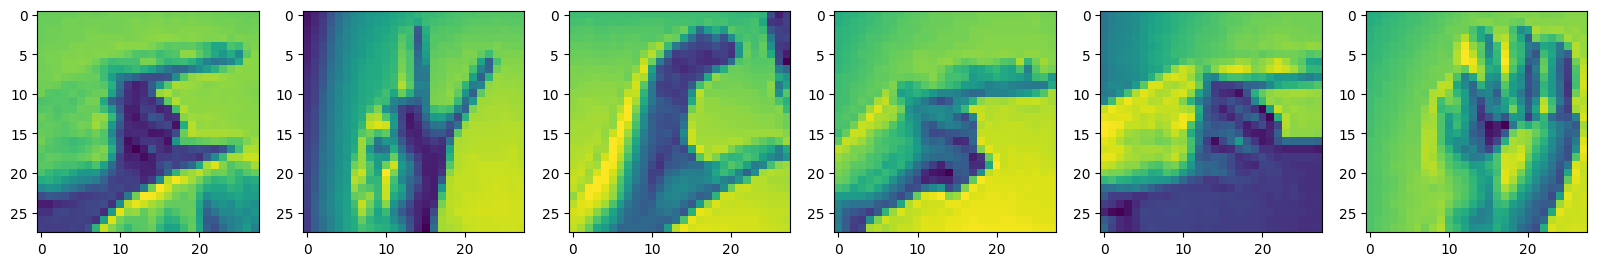

In [9]:
#Data visualization
f=plt.figure(figsize=(20,6))
ax=f.add_subplot(161)
ax2=f.add_subplot(162)
ax3=f.add_subplot(163)
ax4=f.add_subplot(164)
ax5=f.add_subplot(165)
ax6=f.add_subplot(166)
ax.imshow(train.iloc[0].values[1:].reshape(28,28))
ax2.imshow(train.iloc[5].values[1:].reshape(28,28))
ax3.imshow(train.iloc[20].values[1:].reshape(28,28))
ax4.imshow(train.iloc[456].values[1:].reshape(28,28))
ax5.imshow(train.iloc[999].values[1:].reshape(28,28))
ax6.imshow(train.iloc[1500].values[1:].reshape(28,28))

plt.show()

<Axes: ylabel='count'>

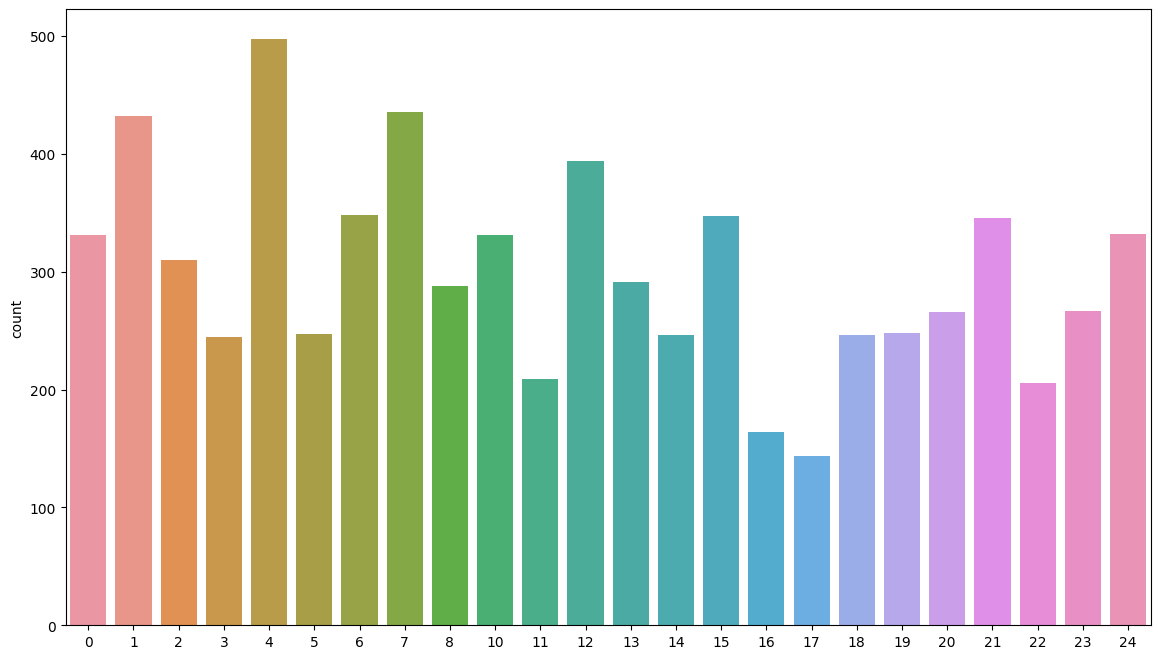

In [10]:
labels = train['label'].values
plt.figure(figsize = (14,8))
sns.countplot(x =labels)

In [11]:

X_train = train.drop(["label"],axis=1)
X_test = test.drop(["label"],axis=1)
Y_train = train['label']
Y_test = test['label']
del train['label']
del test['label']

In [12]:
#Data normalization,CNN works faster
X_train = X_train/255.0
X_test = X_test/255.0
X_train.shape
X_test.shape

(27455, 784)

In [13]:
#Reshaping
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
X_train.shape
X_test.shape

(27455, 28, 28, 1)

In [14]:
#Label encoding
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
Y_train = label_binrizer.fit_transform(Y_train)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (5737, 28, 28, 1)
x_test shape (1435, 28, 28, 1)
y_train shape (5737, 24)
y_test shape (1435, 24)


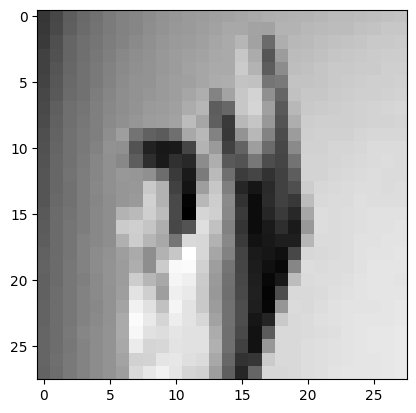

In [16]:
plt.imshow(X_train[10][:,:,0],cmap="gray")
plt.show()

In [26]:
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf

from keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding = 'same', input_shape=(28, 28, 1)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(128, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(512, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),

                        tf.keras.layers.Conv2D(512, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(512, activation='relu'),
                        tf.keras.layers.Dense(24, activation='softmax')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 512)         590336    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 3, 3, 512)        

In [21]:
#optimizer = Adam(lr=0.003, beta_1=0.9, beta_2=0.999)

model.compile( optimizer='rmsprop' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [22]:
epochs = 50
batch_size = 200


In [23]:
#Data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=15,
        zoom_range = 0.5,
        width_shift_range=0.15,
        height_shift_range=0.15,
        horizontal_flip=True,
        vertical_flip=False)

datagen.fit(X_train)

In [24]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/50


<ipython-input-24-6f14273d6fe3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)


28/28 [==============================] - 15s 107ms/step - loss: 3.1608 - accuracy: 0.0652 - val_loss: 3.1518 - val_accuracy: 0.0627
Epoch 2/50
28/28 [==============================] - 2s 87ms/step - loss: 3.1403 - accuracy: 0.0679 - val_loss: 3.1527 - val_accuracy: 0.0627
Epoch 3/50
28/28 [==============================] - 3s 90ms/step - loss: 3.1321 - accuracy: 0.0717 - val_loss: 3.1557 - val_accuracy: 0.0425
Epoch 4/50
28/28 [==============================] - 2s 75ms/step - loss: 3.0895 - accuracy: 0.0997 - val_loss: 2.9538 - val_accuracy: 0.1289
Epoch 5/50
28/28 [==============================] - 2s 74ms/step - loss: 2.9359 - accuracy: 0.1400 - val_loss: 2.9051 - val_accuracy: 0.1436
Epoch 6/50
28/28 [==============================] - 3s 94ms/step - loss: 2.7753 - accuracy: 0.1774 - val_loss: 2.2620 - val_accuracy: 0.2760
Epoch 7/50
28/28 [==============================] - 2s 79ms/step - loss: 2.5664 - accuracy: 0.2131 - val_loss: 2.1529 - val_accuracy: 0.3101
Epoch 8/50
28/28 [====

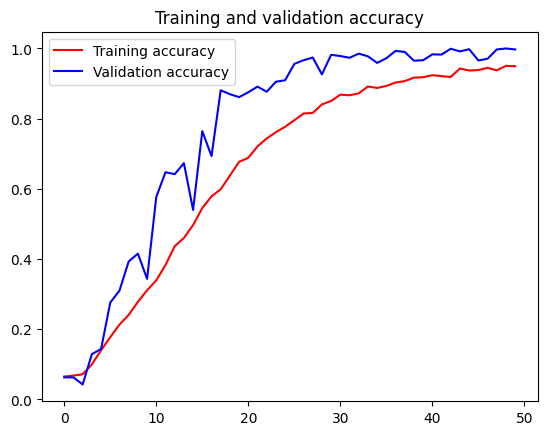

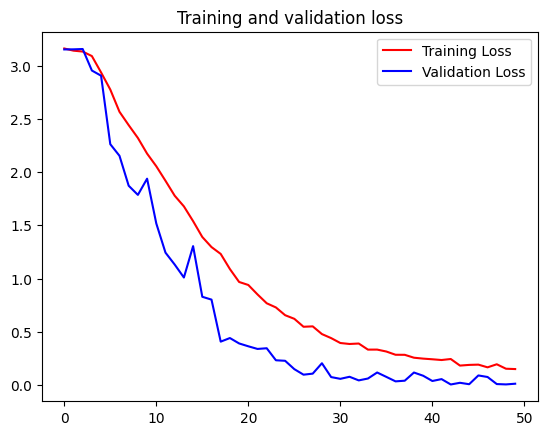

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()